# Creating training data

In this notebook we create training data for deep learning by first creating phantom images (to use as ground truth images) then applying blur and noise operators (to create corrupted input images)

## Create ground truth (phantoms)

We will populate a 3D array with randomly distributed spheres of varying sizes and positions.  Note we do not expect networks trained on these spheres to perform well on other types of content.  

## A note on more general and realistic bio-image training sets

A more realistic training set for biological images could be generated using tools such as [cytopaqc](https://cbia.fi.muni.cz/research/simulations/cytopacq.html).  In the future generative AI may be used in the future to develop more robust training sets.  For the purposes of this tutorial we are mostly looking at a limited content domain of spherical objects.  Even within this limited domain there are some interesting experiments that can be done (for example looking at the variety of training data needed to teach the network to handle combinations of small to large spheres and dim to bright signal levels)

## Point Spread Function (PSF) generation and Image Simulation

We will calculate the PSF, which represents the blurring effect caused by the microscope's optical system. The PSF will be computed based on the microscope's parameters such as magnification, numerical aperture, and focal length.

Convolution with the PSF: The generated 3D image will be convolved with the PSF to simulate the blurring effect of the microscope on the true signal.

Photon shot noise addition: Photon shot noise arises due to the discrete nature of light and affects the number of photons detected by the camera. We will introduce photon shot noise into the convolved image to mimic this stochastic effect.

Cavaets: Please note that this example focuses on the generation of a 3D image, PSF calculation, convolution with the PSF, and addition of photon shot noise. Other aspects, such as optical aberrations, sample interactions, camera characteristics, sensor noise, and post-processing steps, are not considered in this simplified simulation. These additional factors can significantly impact the image quality and should be taken into account for comprehensive microscopy simulations.

## Import dependant libraries

... and define location to put ground truths and images

In [30]:
from tnia.simulation.phantoms import add_sphere3d
from tnia.plotting.projections import show_xy_zy_max, show_xy_zy_slice
from tnia.simulation.phantoms import add_small_to_large
import numpy as np
import random
import raster_geometry as rg
from skimage.io import imsave
from tnia.deconvolution.forward import forward
import os

dl_path = r'../../models'

# can be big, small, or big_small
spheres = 'big_small'
noise = 'high'
na = 'high'

set_name = 'spheres_'+spheres+'_noise_'+noise+'_na_'+na
print(set_name)
# path to put training data
truth_path = os.path.join(dl_path, set_name, 'train', 'ground truth0')
image_path = os.path.join(dl_path, set_name, 'train', 'input0')

if not os.path.exists(truth_path):
    os.makedirs(truth_path)
if not os.path.exists(image_path):
    os.makedirs(image_path)

spheres_big_small_noise_high_na_high


## Create PSF used for simulation

high NA
1.0


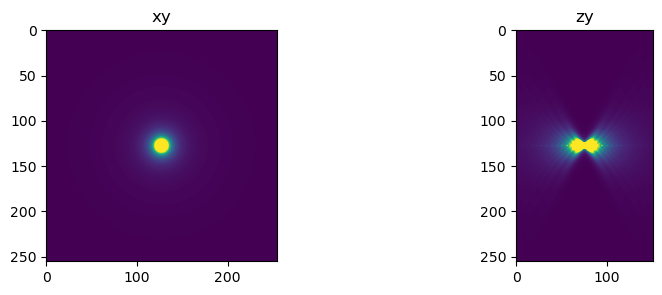

In [31]:
from tnia.deconvolution.psfs import gibson_lanni_3D

# scope parameters
if na == 'high':
    print('high NA')
    ni=1.5
    ns  = 1.33
    NA=1.4
else:
    print('low NA')
    ni=1
    ns= 1
    NA=0.7
w=0.530

# spacings
xy_spacing = .1
z_spacing= .1

#depth to compute PSF this can be used to compute a PSF that has aberrations
#note stil need to confirm the sign of the depth, the negative sign is used to reproduce the experimental PSF
d=0

xy_psf_dim=255
z_psf_dim=151

psf  = gibson_lanni_3D(NA, ni, ns, xy_spacing, z_spacing, xy_psf_dim, z_psf_dim, d, w, use_psfm=True)
psf = psf.astype('float32')

psf=psf/psf.sum()

fig=show_xy_zy_max(psf, vmax=psf.max()/100)
print(psf.sum())


## Create phantom and applying imaging system

In this block we create a set of phantoms, populate them with random spheres, apply the imaging model to them (convolution + Poisson noise), then save them.  

high noise
big and small spheres
number_spheres_added 6


C:\Users\bnort\AppData\Local\Temp\ipykernel_31420\1293624203.py:66: UserWarning: ../../models\spheres_big_small_noise_high_na_high\train\input0\phantom_forward_sub0.tif is a low contrast image
  imsave(image_path + '\phantom_forward_sub'+str(n)+'.tif', phantom_forward_sub)


number_spheres_added 10


C:\Users\bnort\AppData\Local\Temp\ipykernel_31420\1293624203.py:66: UserWarning: ../../models\spheres_big_small_noise_high_na_high\train\input0\phantom_forward_sub1.tif is a low contrast image
  imsave(image_path + '\phantom_forward_sub'+str(n)+'.tif', phantom_forward_sub)


number_spheres_added 17


C:\Users\bnort\AppData\Local\Temp\ipykernel_31420\1293624203.py:66: UserWarning: ../../models\spheres_big_small_noise_high_na_high\train\input0\phantom_forward_sub2.tif is a low contrast image
  imsave(image_path + '\phantom_forward_sub'+str(n)+'.tif', phantom_forward_sub)


number_spheres_added 25


C:\Users\bnort\AppData\Local\Temp\ipykernel_31420\1293624203.py:66: UserWarning: ../../models\spheres_big_small_noise_high_na_high\train\input0\phantom_forward_sub3.tif is a low contrast image
  imsave(image_path + '\phantom_forward_sub'+str(n)+'.tif', phantom_forward_sub)


number_spheres_added 35


C:\Users\bnort\AppData\Local\Temp\ipykernel_31420\1293624203.py:66: UserWarning: ../../models\spheres_big_small_noise_high_na_high\train\input0\phantom_forward_sub4.tif is a low contrast image
  imsave(image_path + '\phantom_forward_sub'+str(n)+'.tif', phantom_forward_sub)


number_spheres_added 41


c:\users\bnort\work\imagej2022\tnia\tnia-python\tnia\plotting\projections.py:228: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig=plt.figure(figsize=figsize)
C:\Users\bnort\AppData\Local\Temp\ipykernel_31420\1293624203.py:66: UserWarning: ../../models\spheres_big_small_noise_high_na_high\train\input0\phantom_forward_sub5.tif is a low contrast image
  imsave(image_path + '\phantom_forward_sub'+str(n)+'.tif', phantom_forward_sub)


number_spheres_added 47


C:\Users\bnort\AppData\Local\Temp\ipykernel_31420\1293624203.py:66: UserWarning: ../../models\spheres_big_small_noise_high_na_high\train\input0\phantom_forward_sub6.tif is a low contrast image
  imsave(image_path + '\phantom_forward_sub'+str(n)+'.tif', phantom_forward_sub)


number_spheres_added 58


C:\Users\bnort\AppData\Local\Temp\ipykernel_31420\1293624203.py:66: UserWarning: ../../models\spheres_big_small_noise_high_na_high\train\input0\phantom_forward_sub7.tif is a low contrast image
  imsave(image_path + '\phantom_forward_sub'+str(n)+'.tif', phantom_forward_sub)


number_spheres_added 70


C:\Users\bnort\AppData\Local\Temp\ipykernel_31420\1293624203.py:66: UserWarning: ../../models\spheres_big_small_noise_high_na_high\train\input0\phantom_forward_sub8.tif is a low contrast image
  imsave(image_path + '\phantom_forward_sub'+str(n)+'.tif', phantom_forward_sub)


number_spheres_added 80


C:\Users\bnort\AppData\Local\Temp\ipykernel_31420\1293624203.py:66: UserWarning: ../../models\spheres_big_small_noise_high_na_high\train\input0\phantom_forward_sub9.tif is a low contrast image
  imsave(image_path + '\phantom_forward_sub'+str(n)+'.tif', phantom_forward_sub)


number_spheres_added 87


C:\Users\bnort\AppData\Local\Temp\ipykernel_31420\1293624203.py:66: UserWarning: ../../models\spheres_big_small_noise_high_na_high\train\input0\phantom_forward_sub10.tif is a low contrast image
  imsave(image_path + '\phantom_forward_sub'+str(n)+'.tif', phantom_forward_sub)


number_spheres_added 92


C:\Users\bnort\AppData\Local\Temp\ipykernel_31420\1293624203.py:66: UserWarning: ../../models\spheres_big_small_noise_high_na_high\train\input0\phantom_forward_sub11.tif is a low contrast image
  imsave(image_path + '\phantom_forward_sub'+str(n)+'.tif', phantom_forward_sub)


number_spheres_added 106


C:\Users\bnort\AppData\Local\Temp\ipykernel_31420\1293624203.py:66: UserWarning: ../../models\spheres_big_small_noise_high_na_high\train\input0\phantom_forward_sub12.tif is a low contrast image
  imsave(image_path + '\phantom_forward_sub'+str(n)+'.tif', phantom_forward_sub)


number_spheres_added 115


C:\Users\bnort\AppData\Local\Temp\ipykernel_31420\1293624203.py:66: UserWarning: ../../models\spheres_big_small_noise_high_na_high\train\input0\phantom_forward_sub13.tif is a low contrast image
  imsave(image_path + '\phantom_forward_sub'+str(n)+'.tif', phantom_forward_sub)


number_spheres_added 120


C:\Users\bnort\AppData\Local\Temp\ipykernel_31420\1293624203.py:66: UserWarning: ../../models\spheres_big_small_noise_high_na_high\train\input0\phantom_forward_sub14.tif is a low contrast image
  imsave(image_path + '\phantom_forward_sub'+str(n)+'.tif', phantom_forward_sub)


number_spheres_added 127


C:\Users\bnort\AppData\Local\Temp\ipykernel_31420\1293624203.py:66: UserWarning: ../../models\spheres_big_small_noise_high_na_high\train\input0\phantom_forward_sub15.tif is a low contrast image
  imsave(image_path + '\phantom_forward_sub'+str(n)+'.tif', phantom_forward_sub)


number_spheres_added 137


C:\Users\bnort\AppData\Local\Temp\ipykernel_31420\1293624203.py:66: UserWarning: ../../models\spheres_big_small_noise_high_na_high\train\input0\phantom_forward_sub16.tif is a low contrast image
  imsave(image_path + '\phantom_forward_sub'+str(n)+'.tif', phantom_forward_sub)


number_spheres_added 146


C:\Users\bnort\AppData\Local\Temp\ipykernel_31420\1293624203.py:66: UserWarning: ../../models\spheres_big_small_noise_high_na_high\train\input0\phantom_forward_sub17.tif is a low contrast image
  imsave(image_path + '\phantom_forward_sub'+str(n)+'.tif', phantom_forward_sub)


number_spheres_added 159


C:\Users\bnort\AppData\Local\Temp\ipykernel_31420\1293624203.py:66: UserWarning: ../../models\spheres_big_small_noise_high_na_high\train\input0\phantom_forward_sub18.tif is a low contrast image
  imsave(image_path + '\phantom_forward_sub'+str(n)+'.tif', phantom_forward_sub)


number_spheres_added 166


C:\Users\bnort\AppData\Local\Temp\ipykernel_31420\1293624203.py:66: UserWarning: ../../models\spheres_big_small_noise_high_na_high\train\input0\phantom_forward_sub19.tif is a low contrast image
  imsave(image_path + '\phantom_forward_sub'+str(n)+'.tif', phantom_forward_sub)


number_spheres_added 177


C:\Users\bnort\AppData\Local\Temp\ipykernel_31420\1293624203.py:66: UserWarning: ../../models\spheres_big_small_noise_high_na_high\train\input0\phantom_forward_sub20.tif is a low contrast image
  imsave(image_path + '\phantom_forward_sub'+str(n)+'.tif', phantom_forward_sub)


number_spheres_added 181


C:\Users\bnort\AppData\Local\Temp\ipykernel_31420\1293624203.py:66: UserWarning: ../../models\spheres_big_small_noise_high_na_high\train\input0\phantom_forward_sub21.tif is a low contrast image
  imsave(image_path + '\phantom_forward_sub'+str(n)+'.tif', phantom_forward_sub)


number_spheres_added 188


C:\Users\bnort\AppData\Local\Temp\ipykernel_31420\1293624203.py:66: UserWarning: ../../models\spheres_big_small_noise_high_na_high\train\input0\phantom_forward_sub22.tif is a low contrast image
  imsave(image_path + '\phantom_forward_sub'+str(n)+'.tif', phantom_forward_sub)


number_spheres_added 197


C:\Users\bnort\AppData\Local\Temp\ipykernel_31420\1293624203.py:66: UserWarning: ../../models\spheres_big_small_noise_high_na_high\train\input0\phantom_forward_sub23.tif is a low contrast image
  imsave(image_path + '\phantom_forward_sub'+str(n)+'.tif', phantom_forward_sub)


number_spheres_added 206


C:\Users\bnort\AppData\Local\Temp\ipykernel_31420\1293624203.py:66: UserWarning: ../../models\spheres_big_small_noise_high_na_high\train\input0\phantom_forward_sub24.tif is a low contrast image
  imsave(image_path + '\phantom_forward_sub'+str(n)+'.tif', phantom_forward_sub)


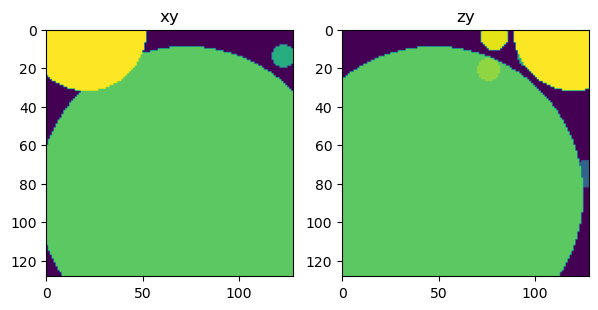

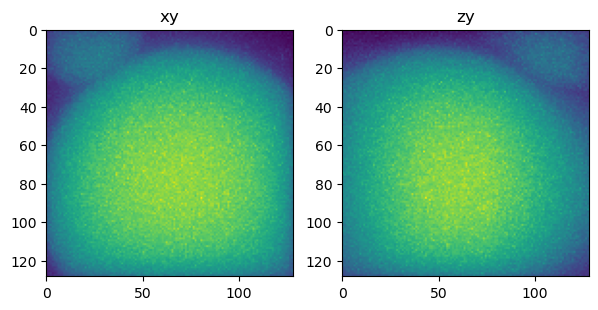

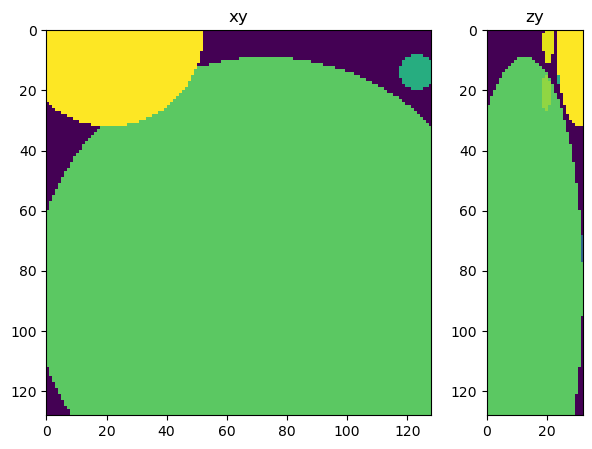

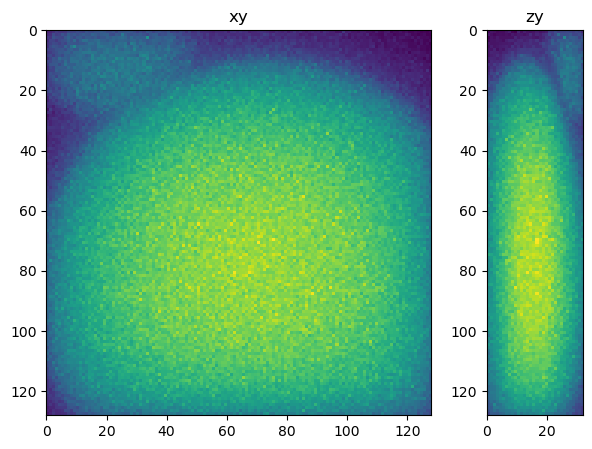

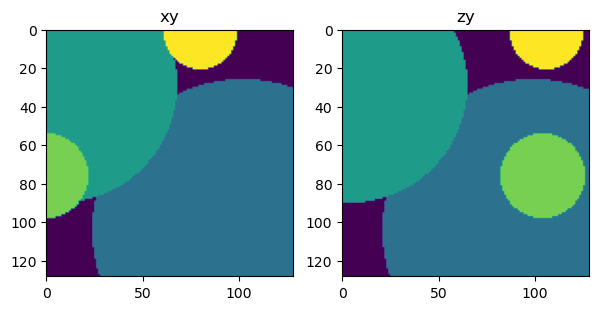

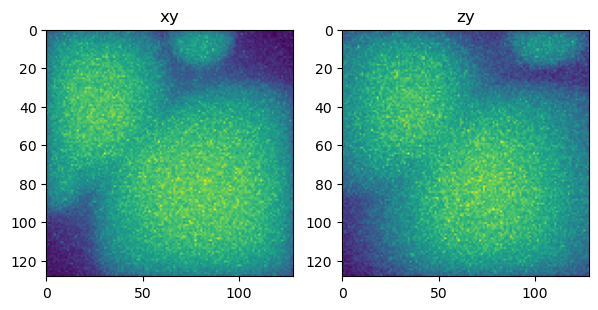

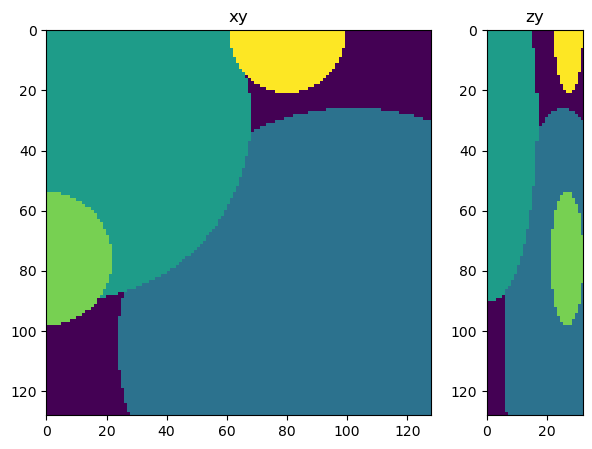

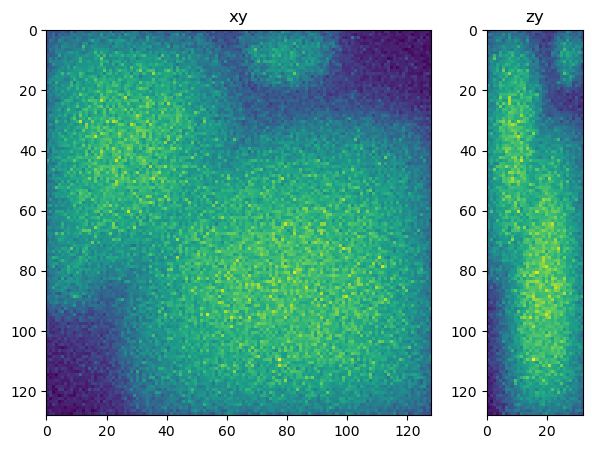

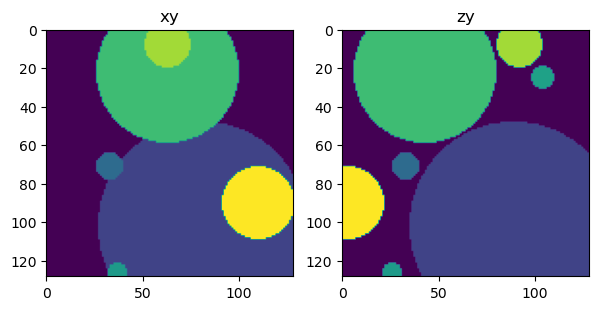

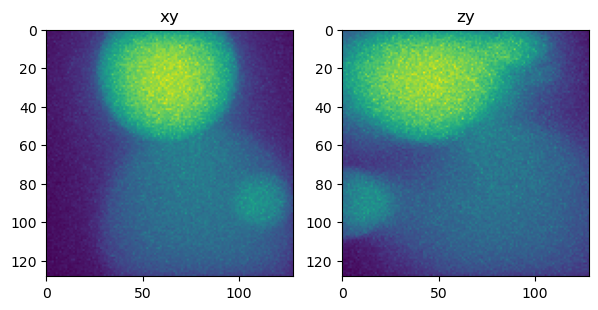

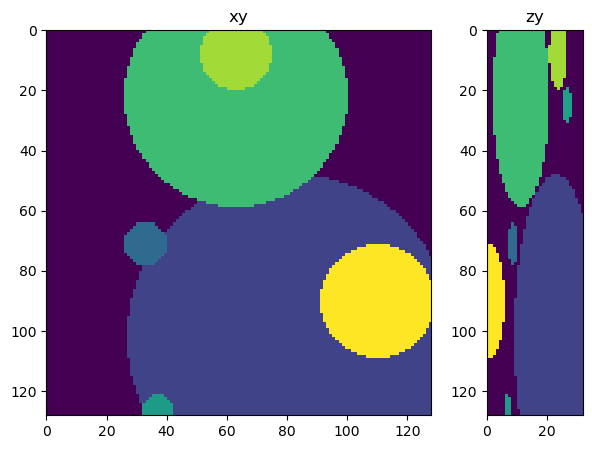

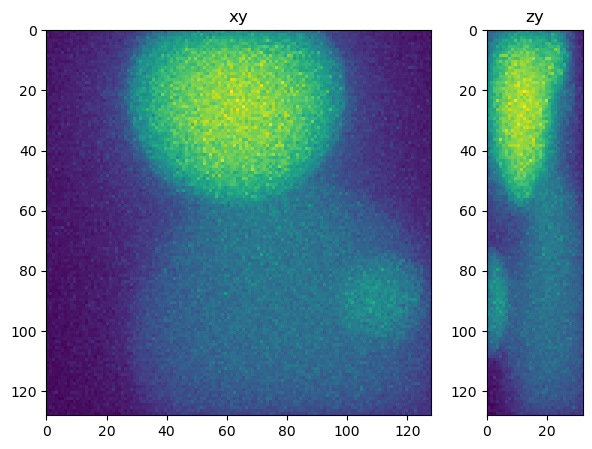

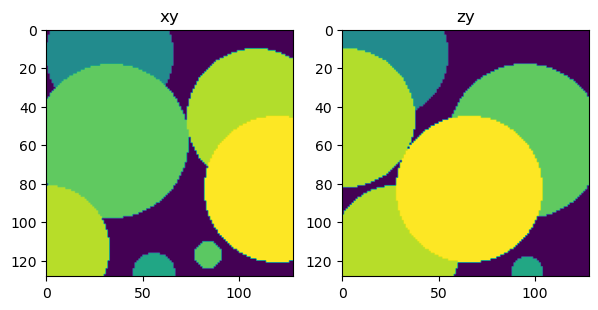

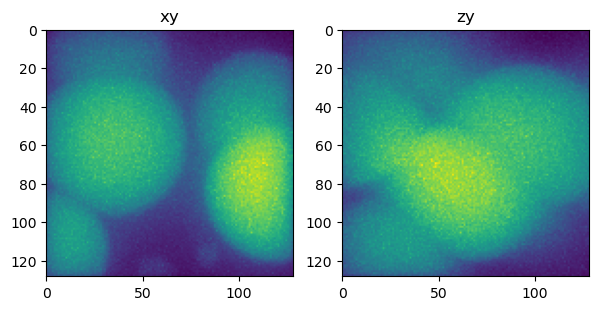

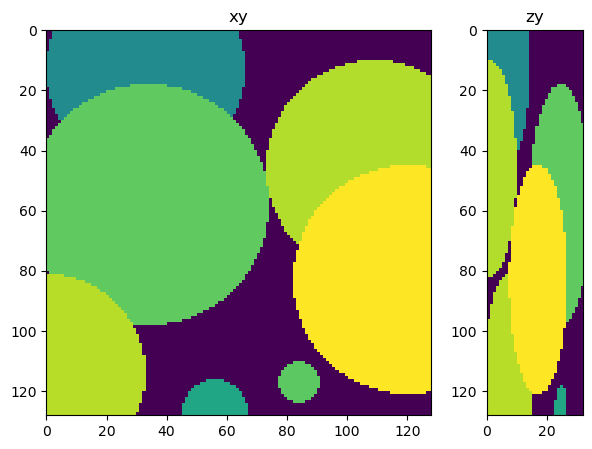

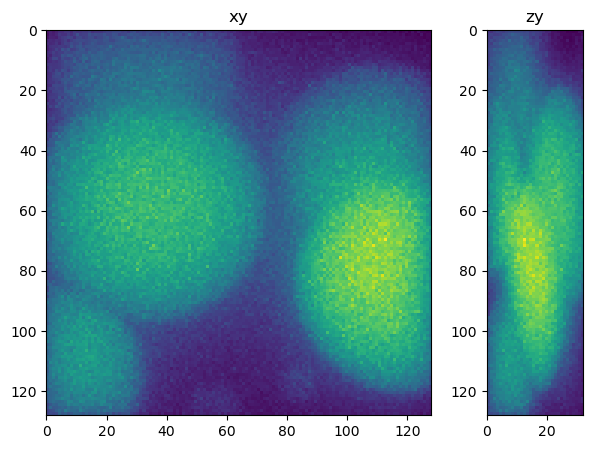

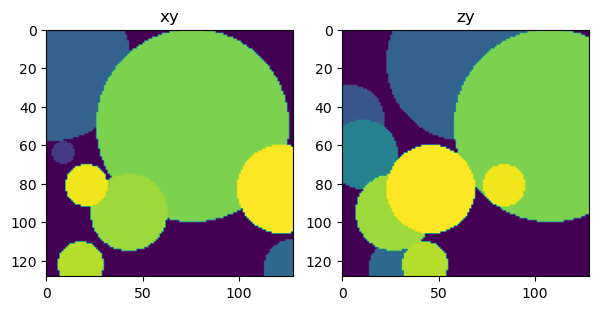

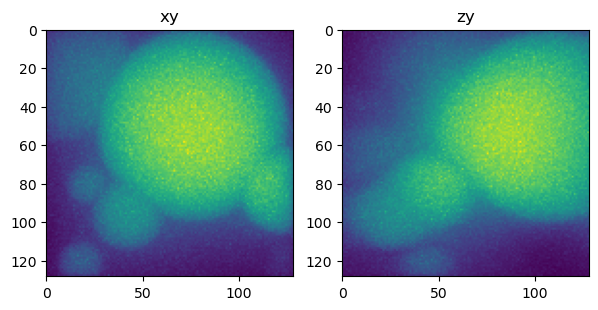

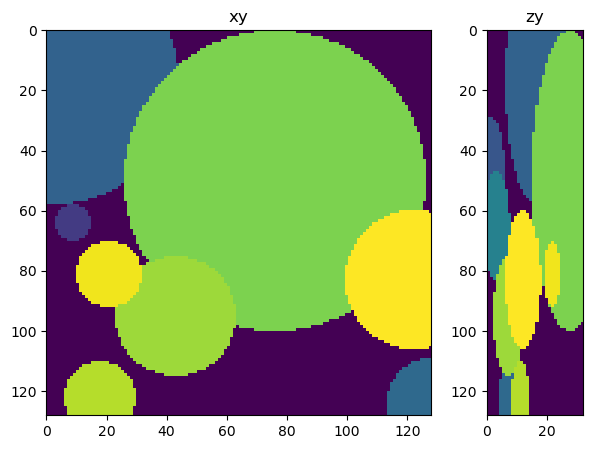

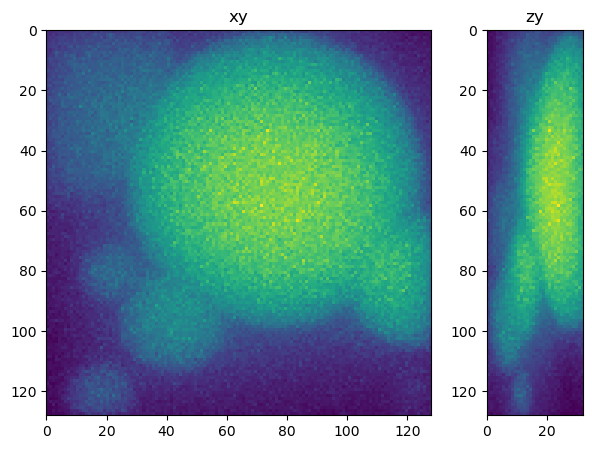

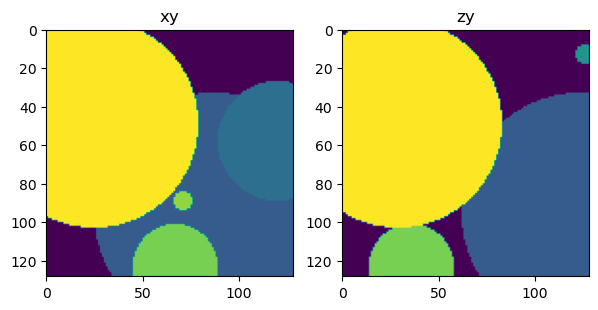

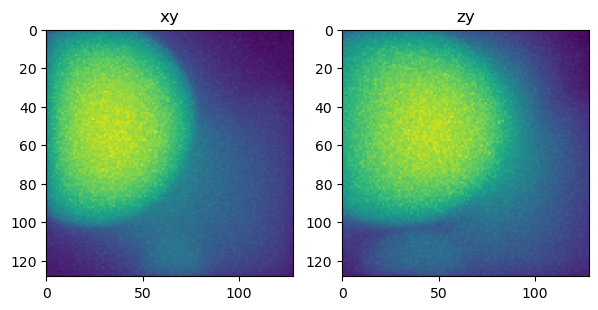

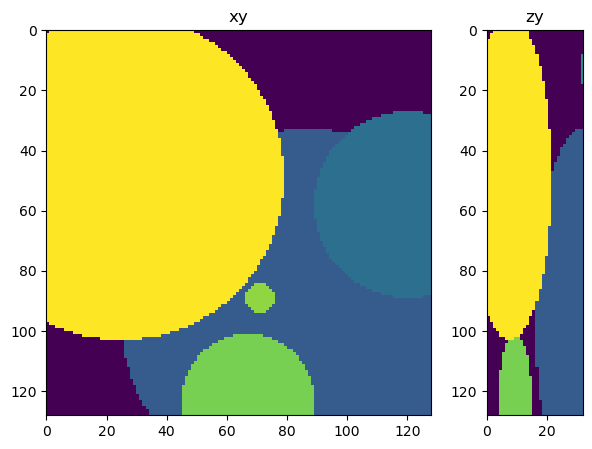

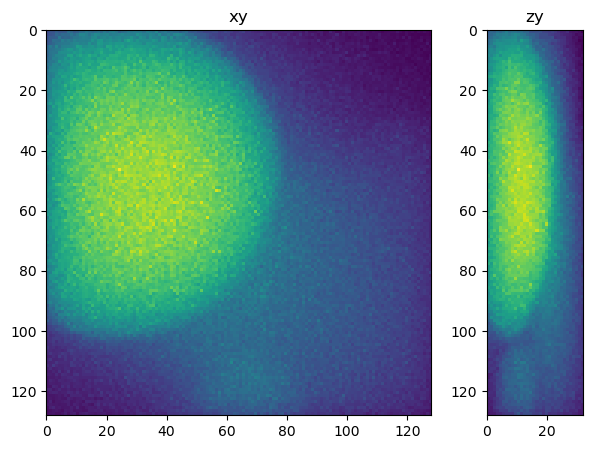

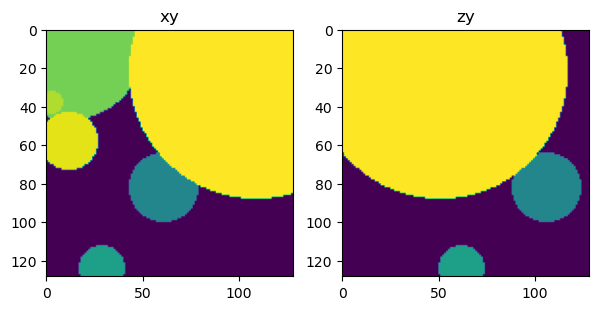

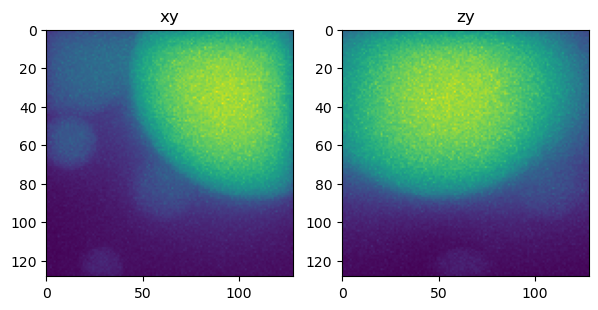

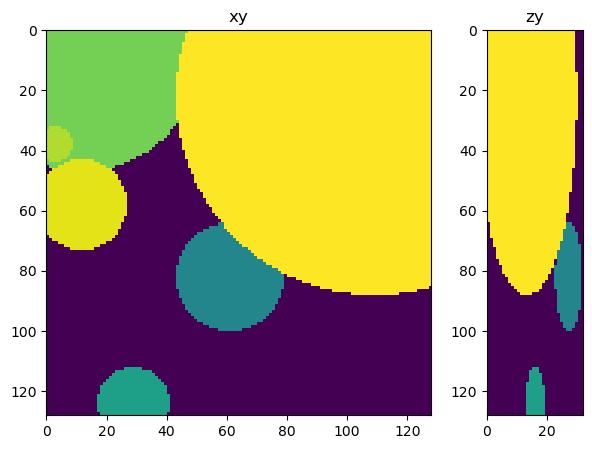

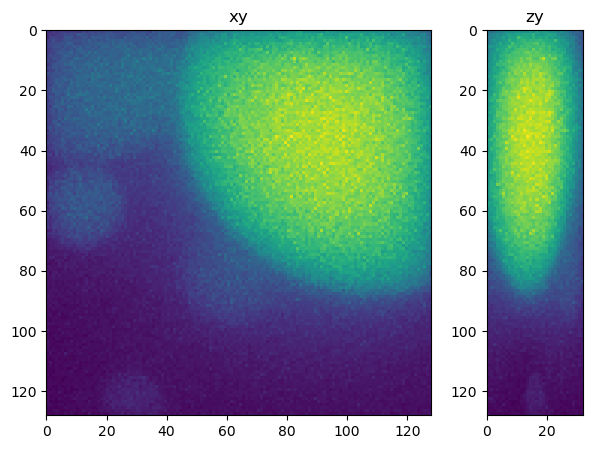

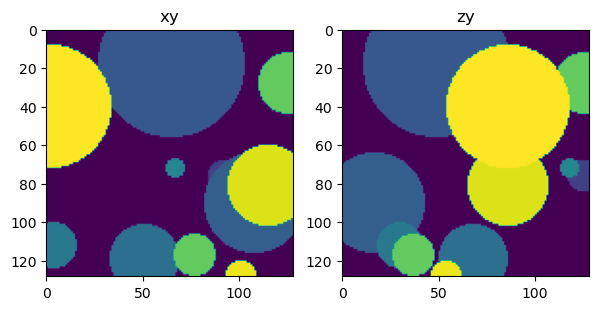

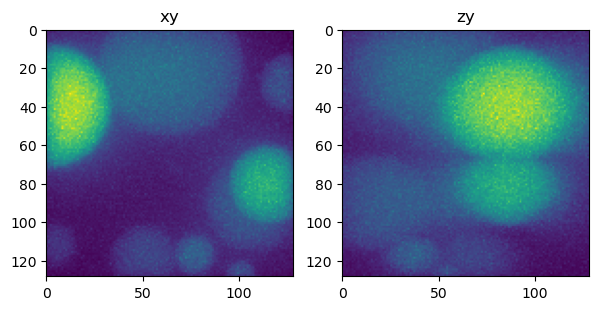

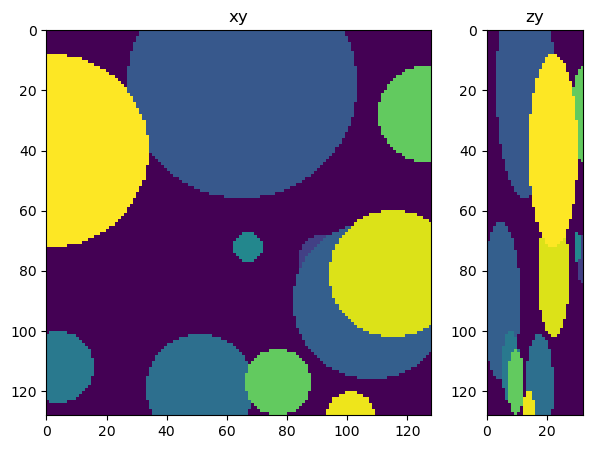

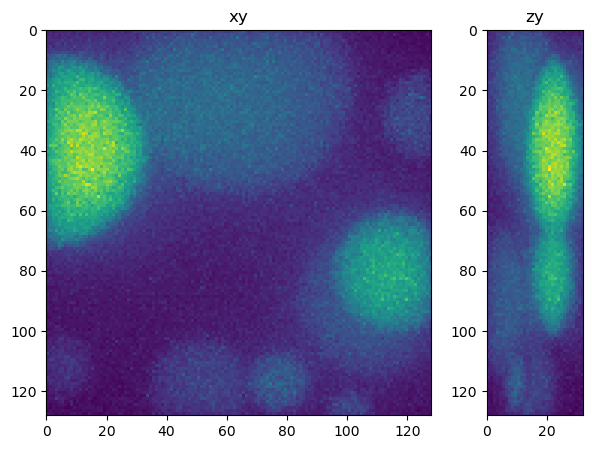

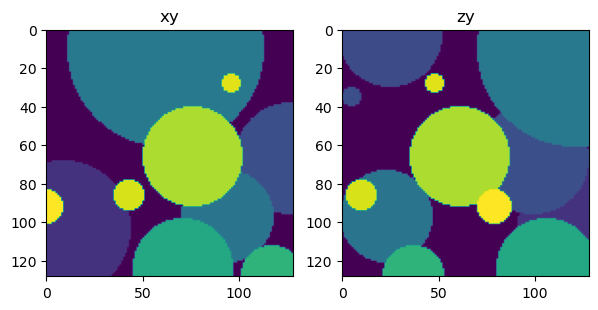

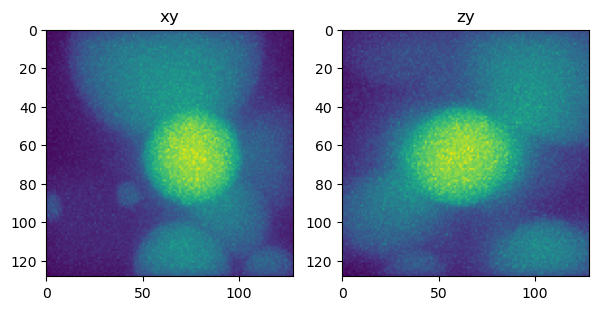

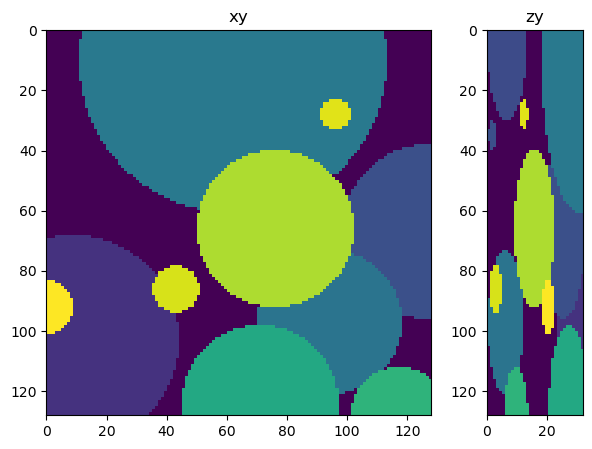

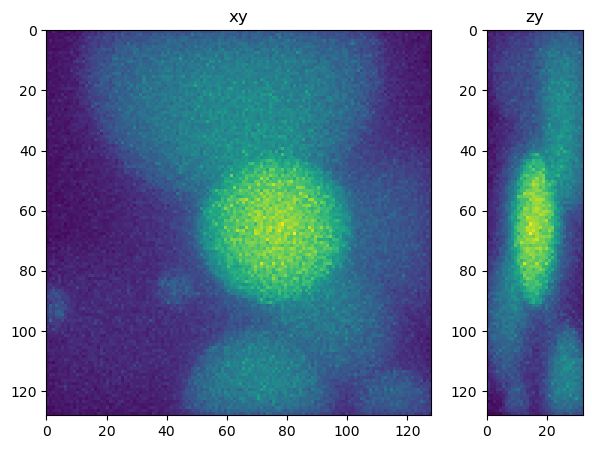

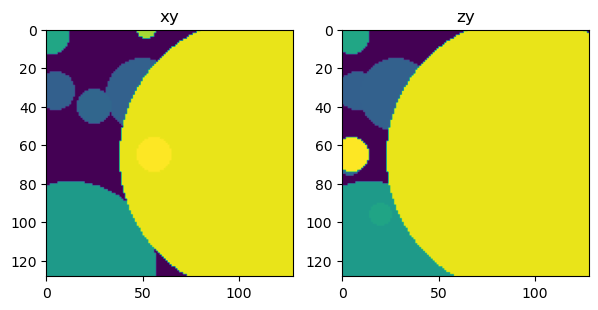

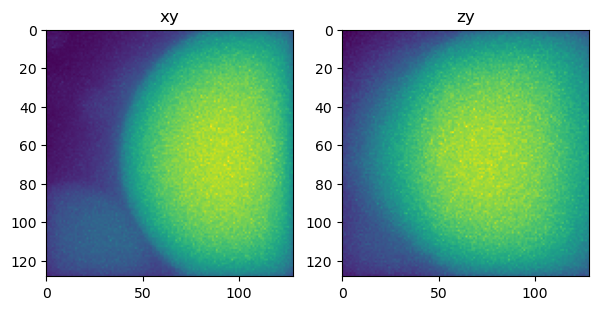

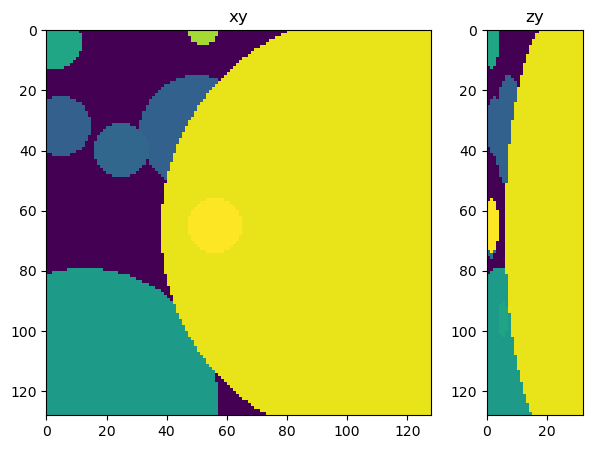

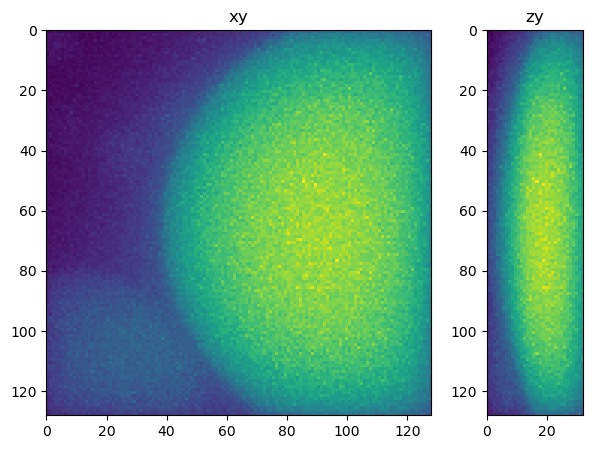

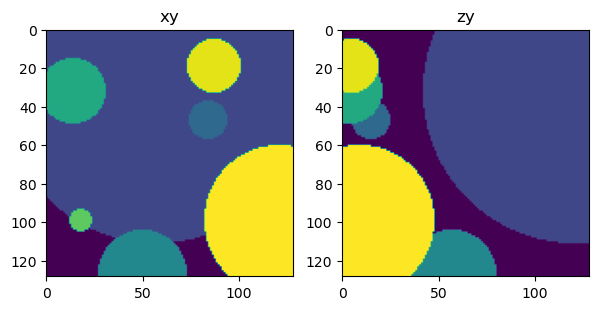

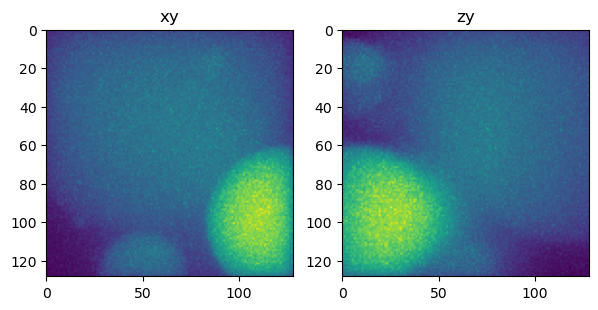

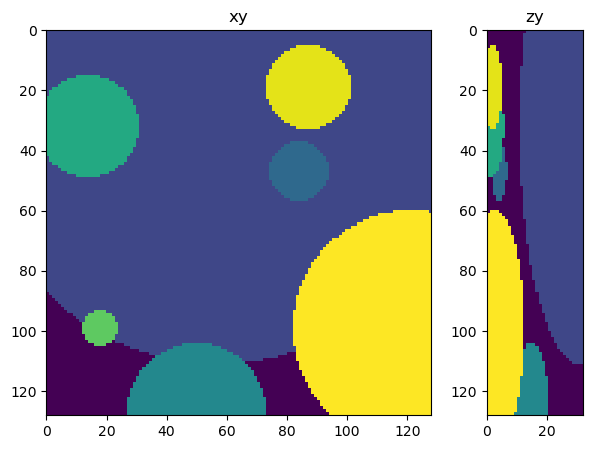

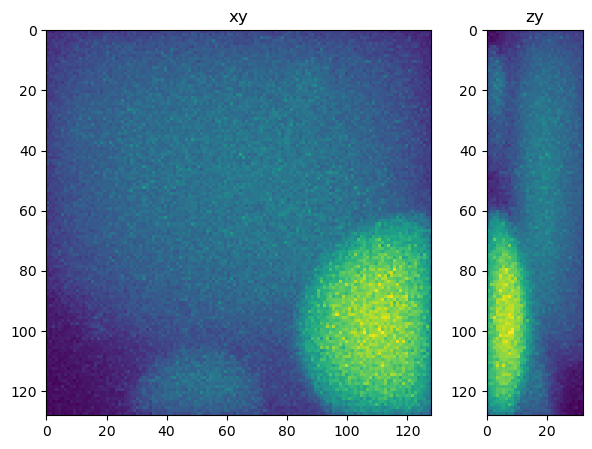

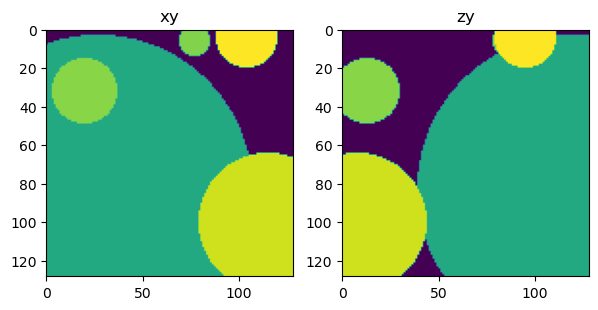

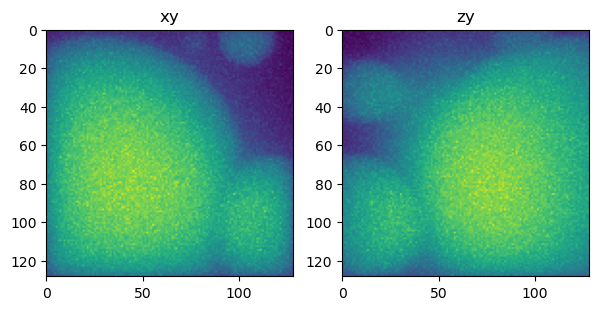

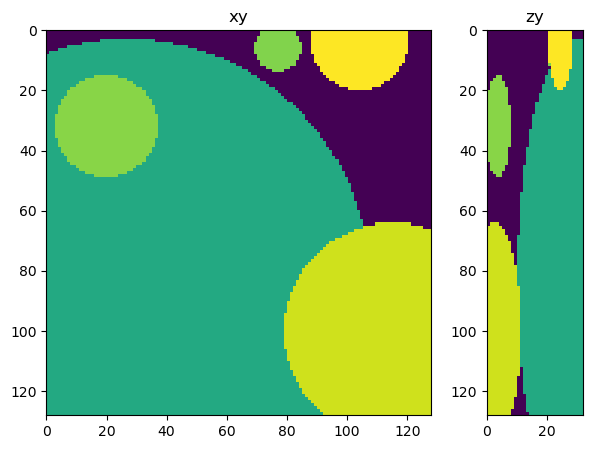

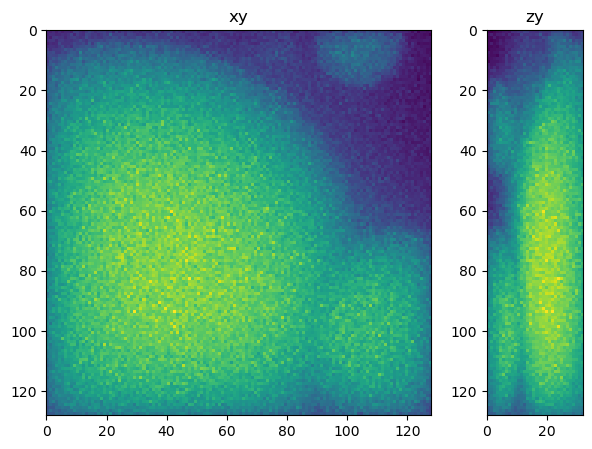

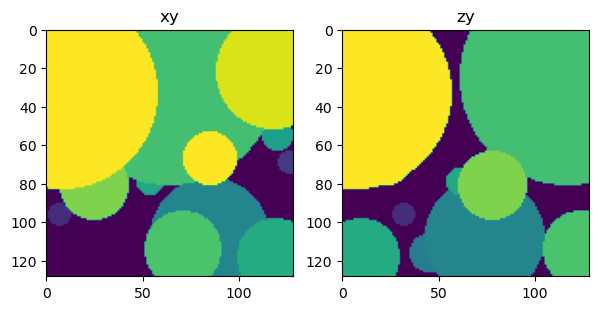

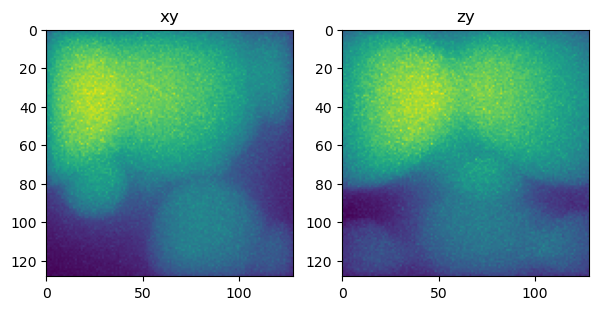

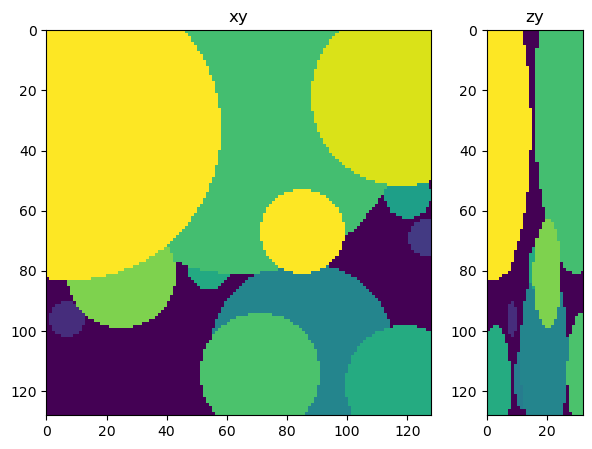

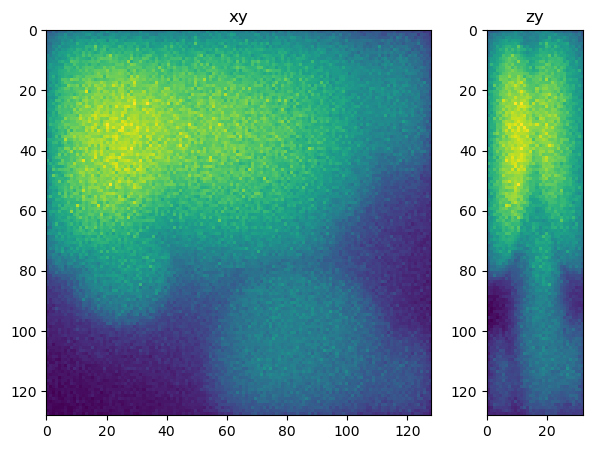

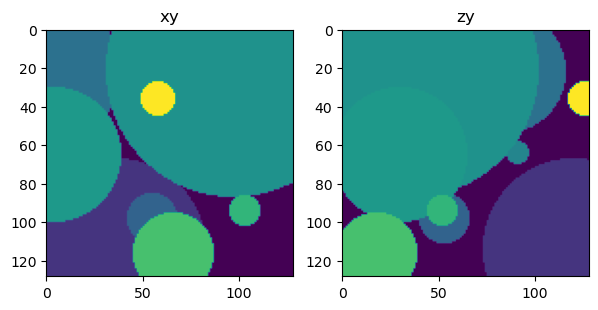

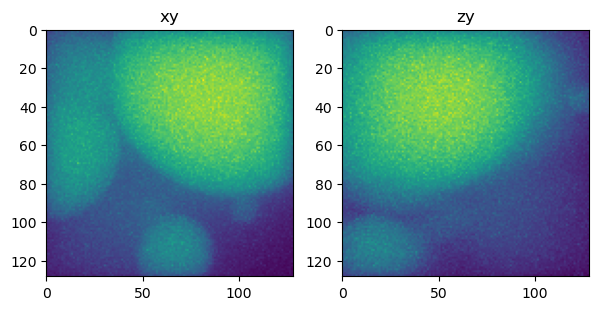

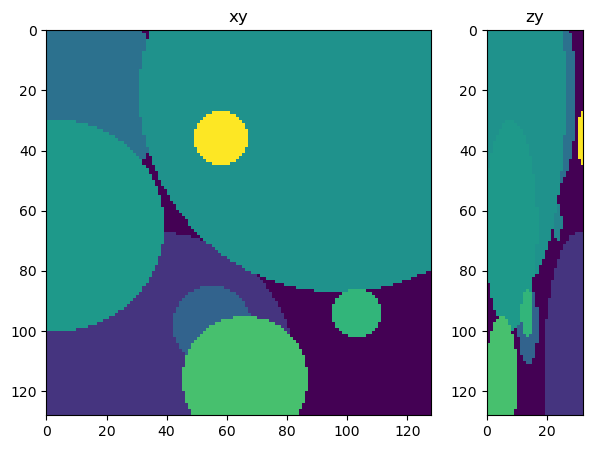

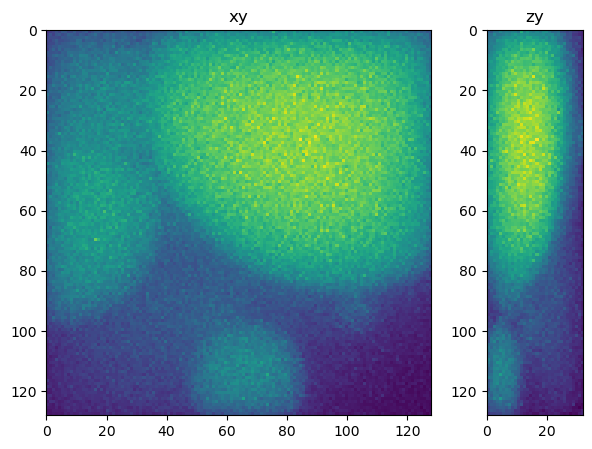

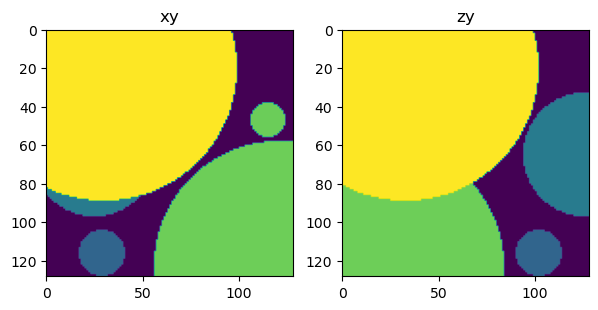

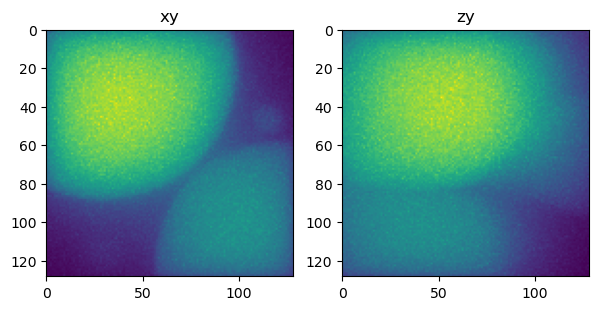

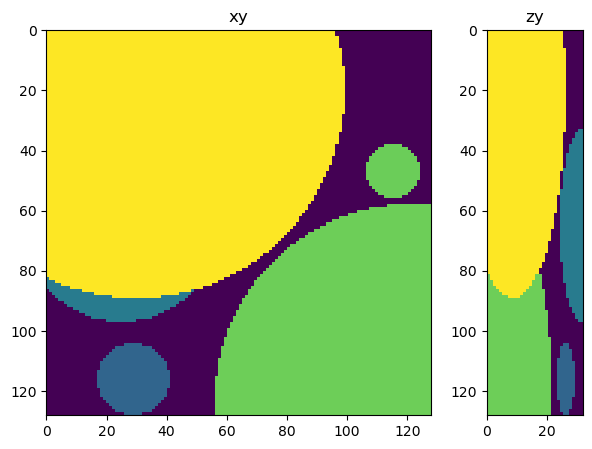

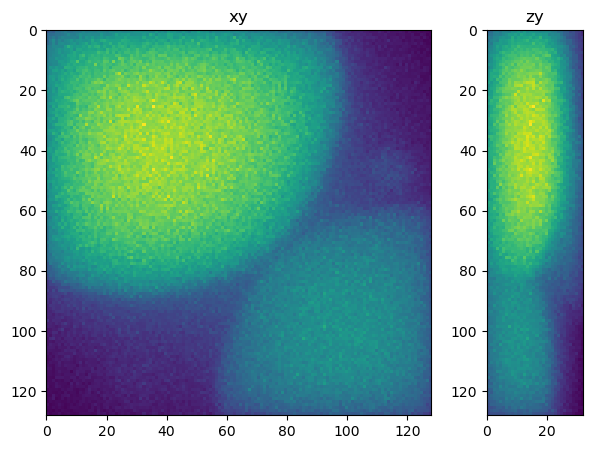

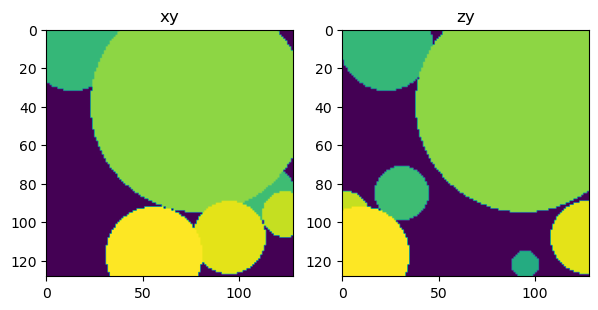

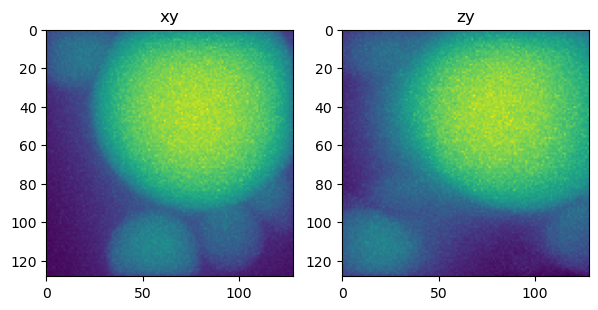

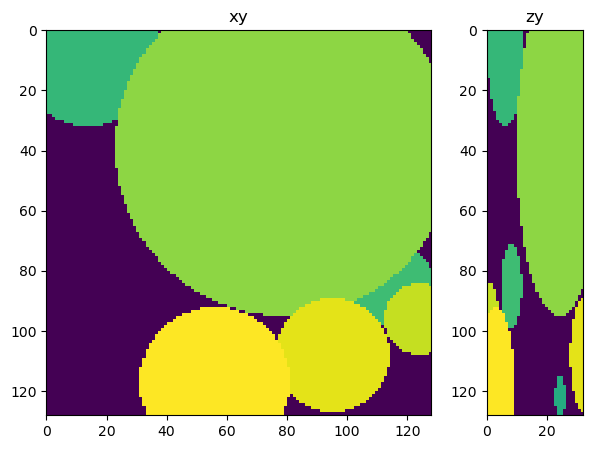

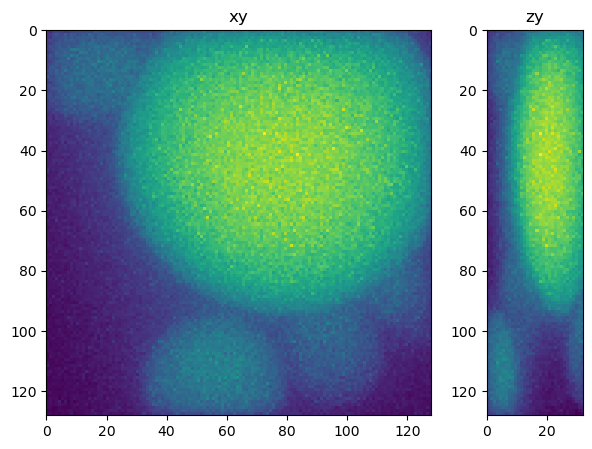

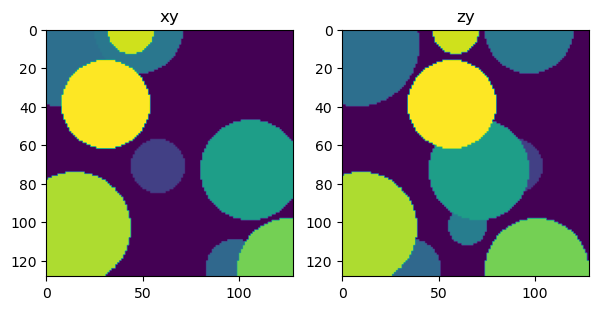

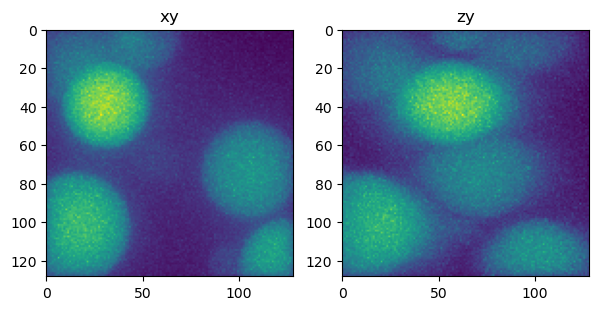

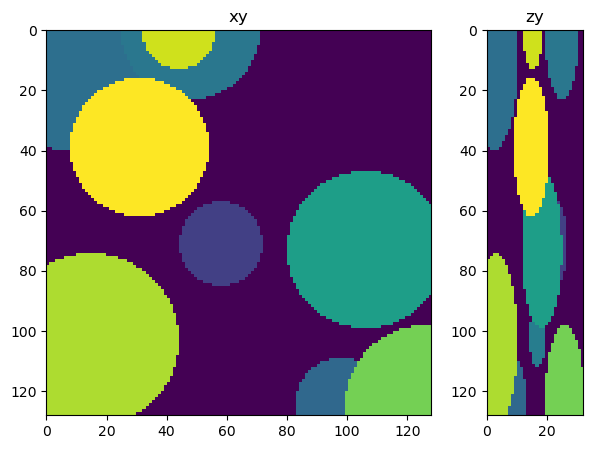

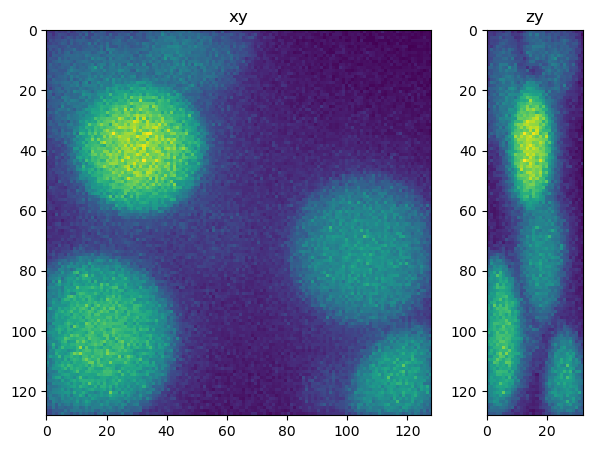

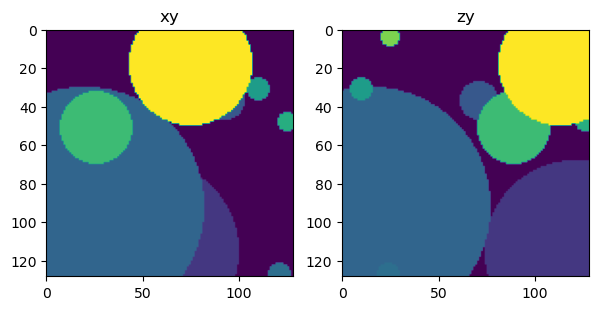

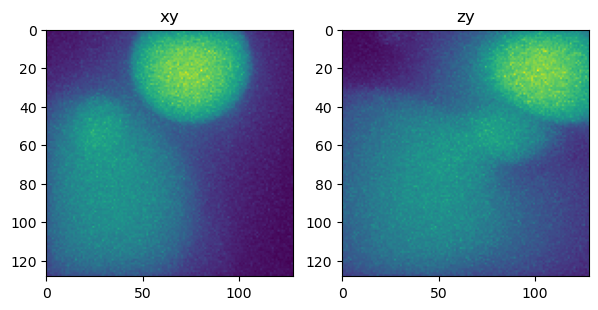

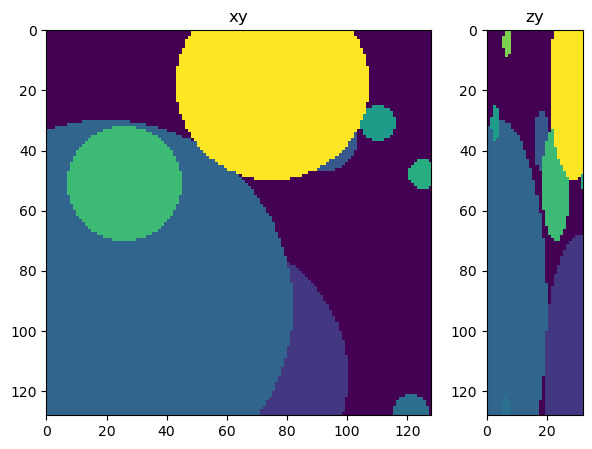

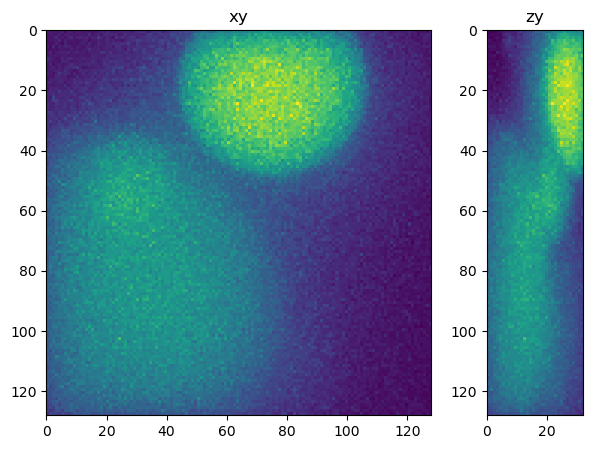

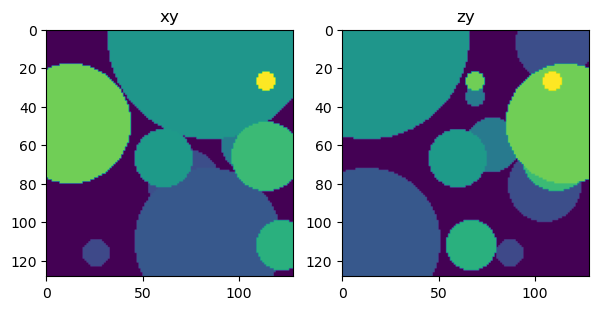

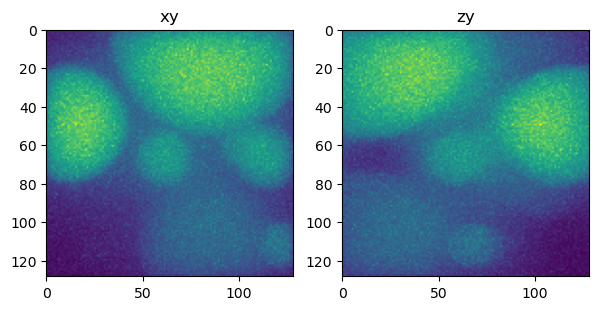

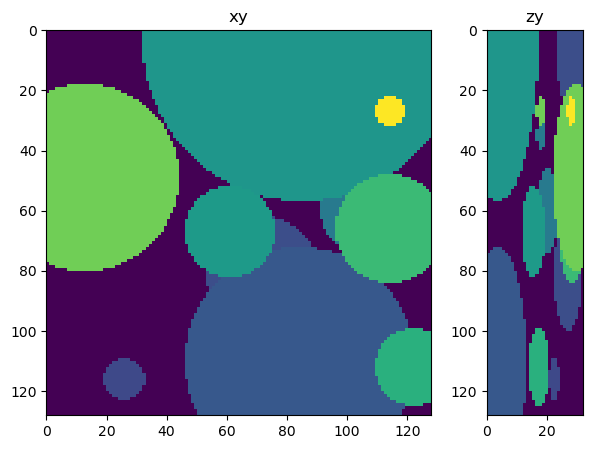

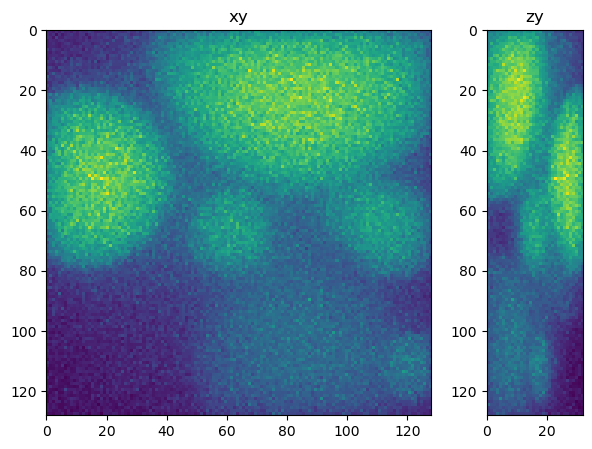

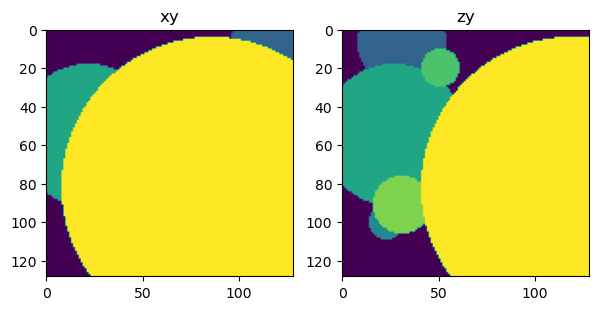

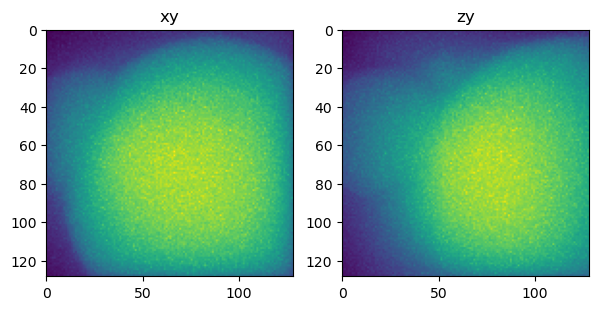

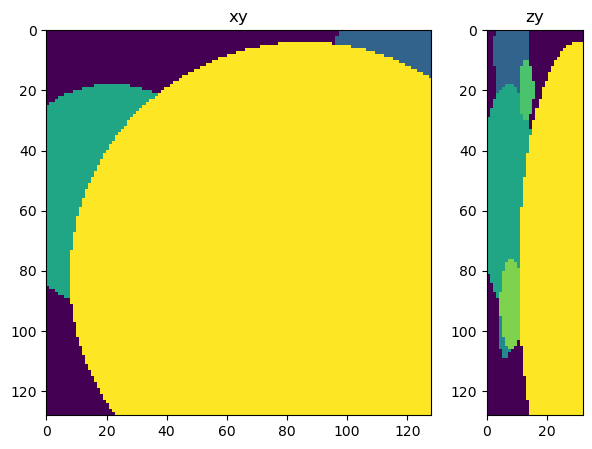

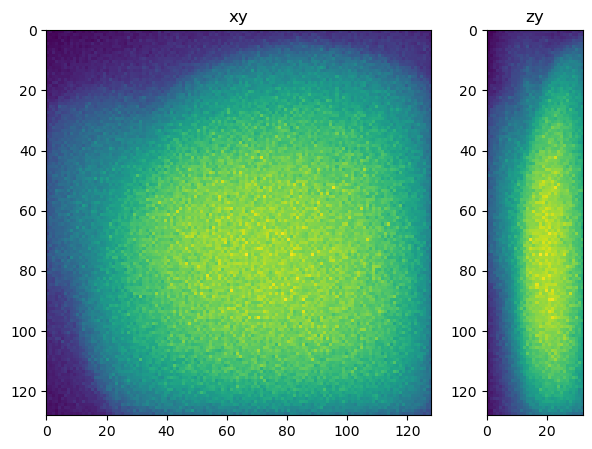

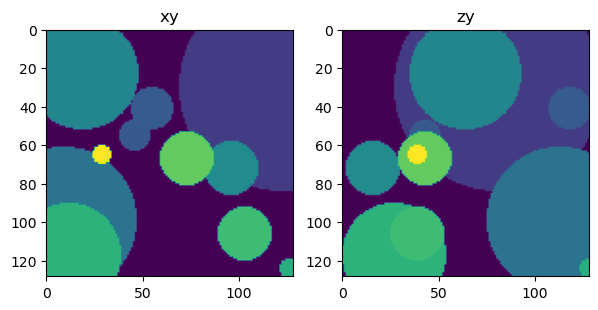

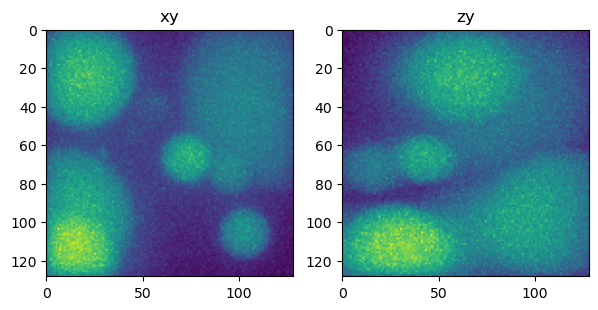

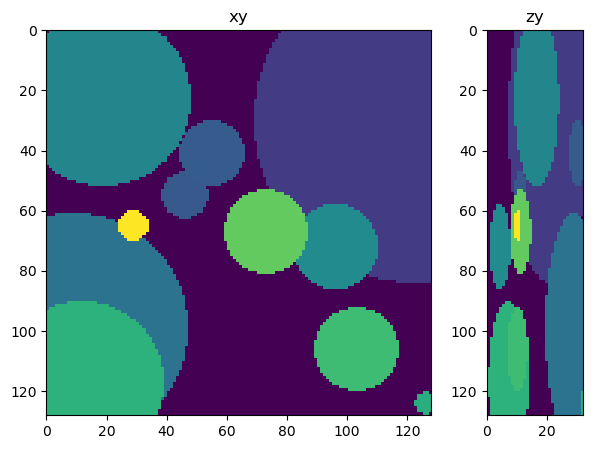

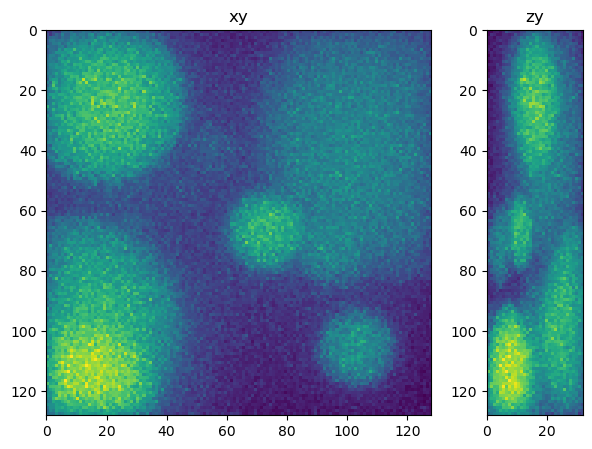

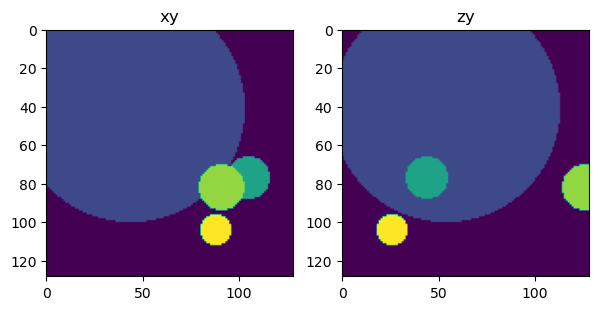

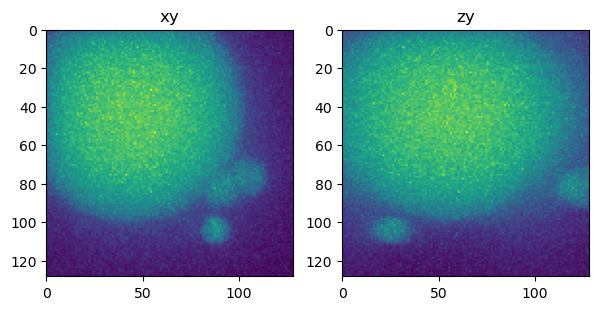

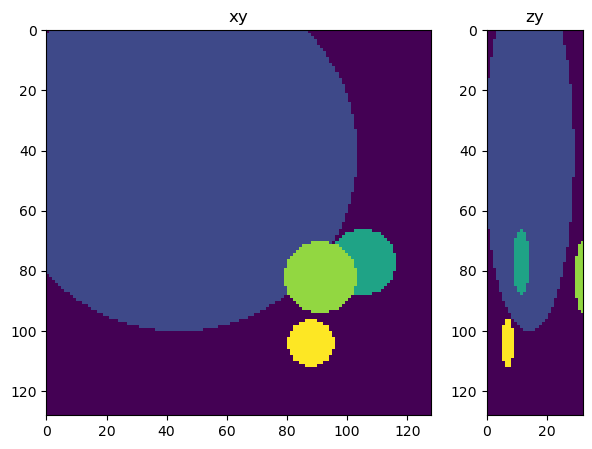

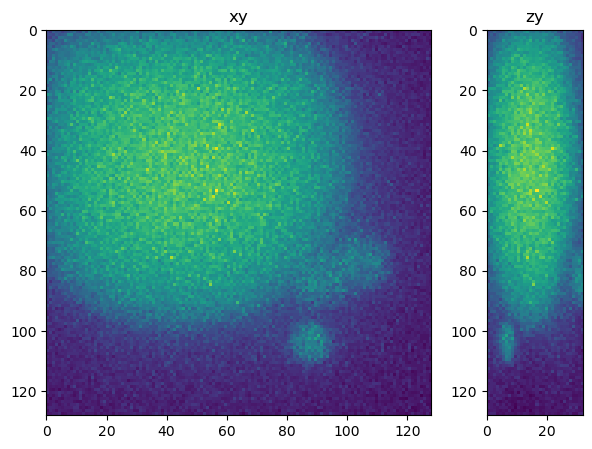

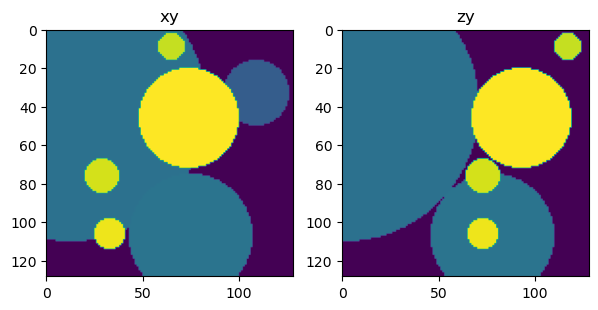

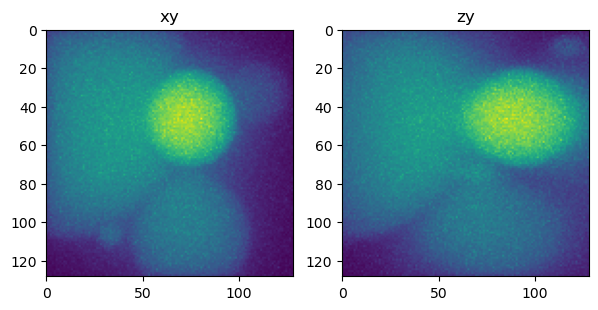

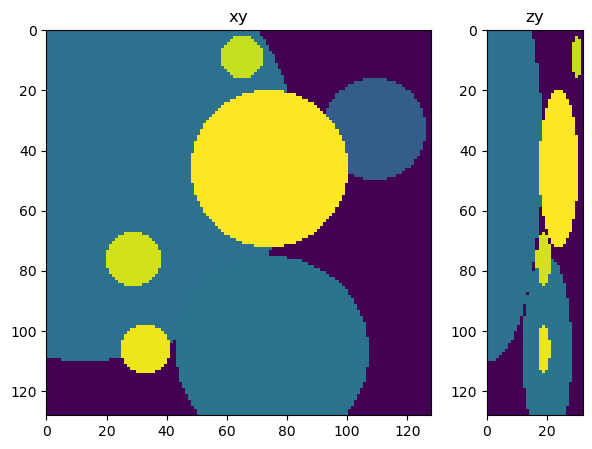

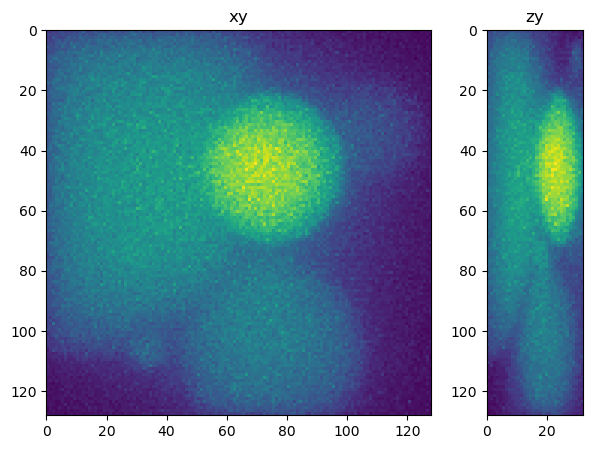

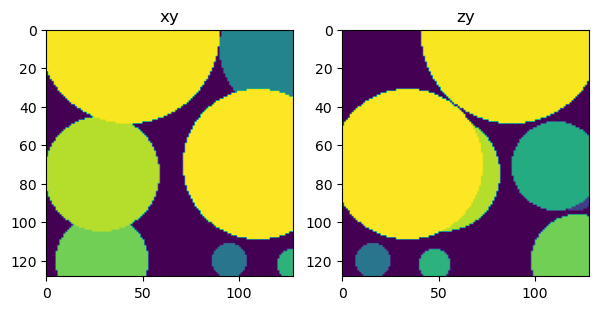

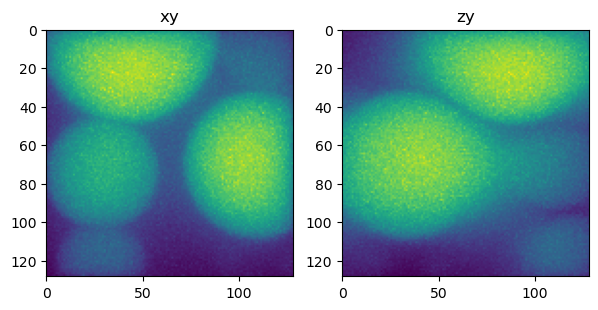

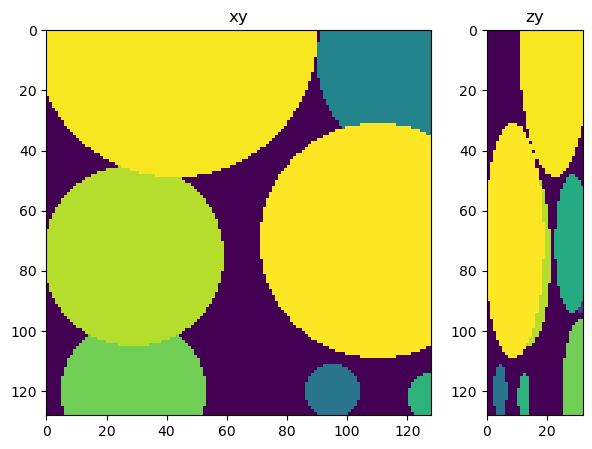

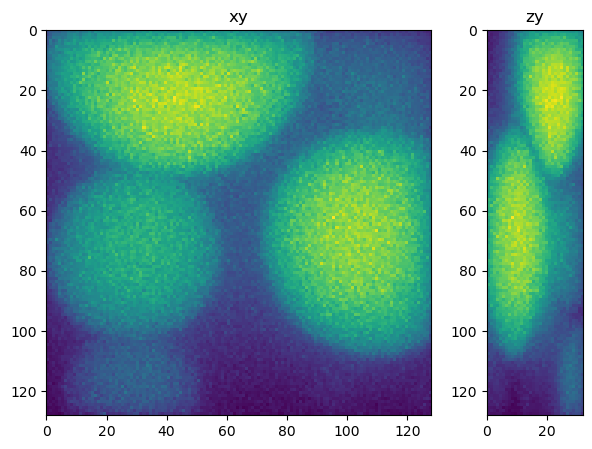

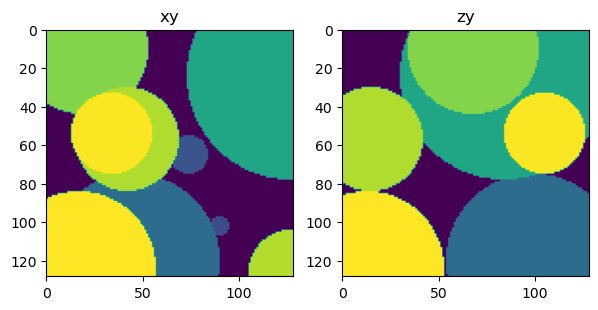

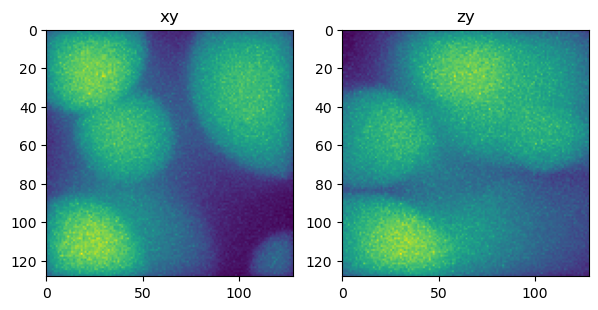

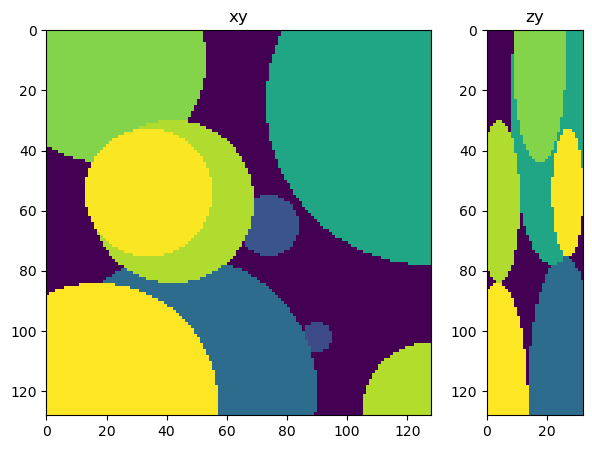

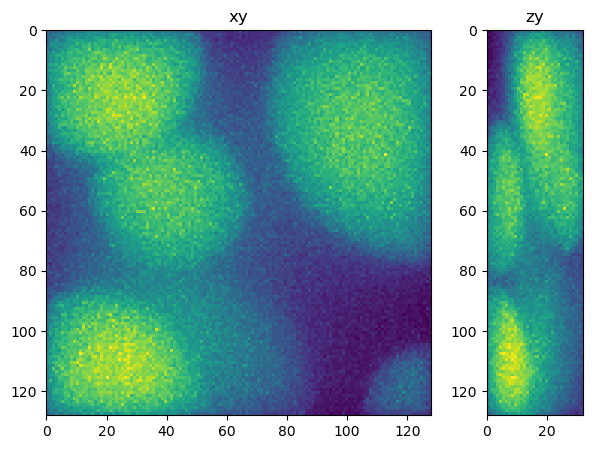

In [32]:
xdim=128
ydim=128
zdim=128

number_images=25
number_spheres=50
number_spheres_added = 0

if noise == 'low':
    print('low noise')
    gain = 10
else:
    print('high noise')
    gain = 0.5

if spheres == 'big':
    print('big spheres')
    min_radius = 24
    max_radius = 80
elif spheres == 'small':
    print('small spheres')
    min_radius = 5
    max_radius = 15
else:
    print('big and small spheres')
    min_radius = 5
    max_radius = 80

gpu = False

for n in range(0,number_images):

    phantom = np.zeros([zdim,xdim,ydim], dtype=np.float32)
    
    for i in range(0,number_spheres):
        x=random.randint(0,xdim)
        y=random.randint(0,ydim)
        z=random.randint(0,zdim)
        intensity = random.randint(100,800) 

        #print(i,x,y,z)

        r=random.randint(min_radius,max_radius)

        size = [2*r, 2*r, 2*r]
        sphere = rg.sphere(size, r).astype(np.float32)
        sphere = sphere*intensity
        #add_sphere3d(phantom, 20, x, y, z, intensity, 2)
        if add_small_to_large(phantom, sphere, x, y, z, True) == True:
            number_spheres_added += 1

    print('number_spheres_added', number_spheres_added)

    phantom = phantom*gain
    phantom_forward = forward(phantom, psf, 10, True, gpu=gpu)
    sub_sample = 4 
    phantom_sub = phantom[::sub_sample,:,:]
    phantom_forward_sub = phantom_forward[::sub_sample,:,:]

    fig=show_xy_zy_max(phantom, figsize=(7,5))
    fig = show_xy_zy_max(phantom_forward, figsize=(7,5))
    fig = show_xy_zy_max(phantom_sub, figsize=(7,5))
    fig = show_xy_zy_max(phantom_forward_sub, figsize=(7,5))

    imsave(truth_path + '\phantom_sub'+str(n)+'.tif', phantom_sub)
    imsave(image_path + '\phantom_forward_sub'+str(n)+'.tif', phantom_forward_sub)

In [10]:
import napari
viewer = napari.Viewer()
viewer.add_image(phantom)
viewer.add_image(phantom_forward)

<Image layer 'phantom_forward' at 0x19240dba700>

In [53]:
phantom_forward_sub.shape

(86, 256, 256)